In [115]:
import numpy as np
from acrobot_env_extended import AcrobotEnvExtended
import random 

In [116]:
env = AcrobotEnvExtended(render_mode='rgb_array')

In [117]:
cost1_space = np.linspace(-1, 1, 5)
sint1_space = np.linspace(-1, 1, 5)
cost2_space = np.linspace(-1, 1, 10)
sint2_space = np.linspace(-1, 1, 10)
velt1_space = np.linspace(-12.57, 12.57, 30)
velt2_space = np.linspace(-28.27, 28.27, 20)

In [131]:
cost2_space

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [119]:
def get_state(obs):
    c1,s1,c2,s2,vt1,vt2 = obs
    c1_bin = int(np.digitize(c1, cost1_space))
    s1_bin = int(np.digitize(s1, sint1_space))
    c2_bin = int(np.digitize(c2, cost2_space))
    s2_bin = int(np.digitize(s2, sint2_space))
    vt1_bin = int(np.digitize(vt1, velt1_space))
    vt2_bin = int(np.digitize(vt2, velt2_space))
    return c1_bin, s1_bin,c2_bin,s2_bin,vt1_bin,vt2_bin

In [120]:
state = get_state(np.array([-0.4, 0.2, 0.3, 0.4, 0.5, 0.6]))
state

(2, 3, 6, 7, 16, 10)

In [121]:
actions = list(range(env.action_space.n))
actions

[0, 1, 2]

In [122]:
Q = np.zeros((len(cost1_space)+1, len(sint1_space)+1, len(cost2_space)+1, len(sint2_space)+1, len(velt1_space)+1, len(velt2_space)+1, len(actions)))
Q

array([[[[[[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           ...,

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [

In [136]:
import numpy as np


# Observación del estado obtenida [0, 0, 0, 0, 0, 0]
observacion_estado = [4 , 3 , 9 , 5, 15, 10]

# Convertir la observación en índices
indice_observacion = tuple(observacion_estado)

# Obtener los valores asociados a las acciones posibles
valores_acciones = np.argmax(Q[indice_observacion])

print("Valores asociados a las acciones posibles:", valores_acciones)

Valores asociados a las acciones posibles: 0


In [124]:
def optimal_policy(Q, state):
    action = np.argmax(Q[state])
    return action

In [125]:
stateEX = [0, 0, 0, 0, 0, 0]

In [133]:
print(Q[0,0,0,0,0,0,0])

0.0


In [127]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
        print('explore')
    # exploit
    else:
        action = np.argmax(Q[state])
        print('exploit')
        
    return action

In [128]:
import matplotlib.pyplot as plt

score -184.0 epsilon %.3f 0.01


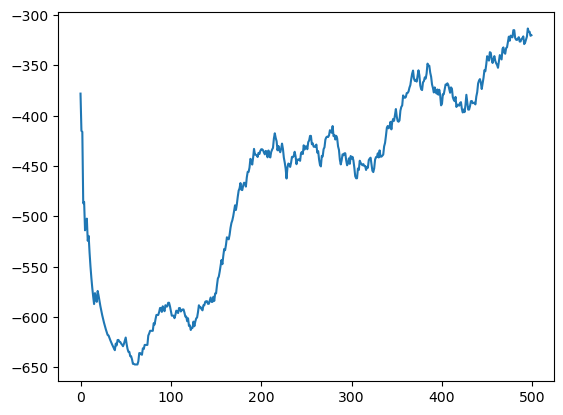

In [161]:
if __name__ == '__main__':
    n_games = 500
    alpha = 1
    gamma = 0.99
    eps = 1.0
    best_score = -np.inf

    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    score = 0
    total_rewards = np.zeros(n_games)
    for i in range(n_games):
        alpha = 1.1 - i/n_games
        
        done = False
        obs = env.reset()[0]
        state = get_state(obs)
        if i % 1000 == 0 and i > 0:
            print ('episode',i,'score',score,'epsilon %.3f', eps)
        score =0
        while not done: 
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                else optimal_policy(Q, state)
            obs_, reward, done, _, _ = env.step(action)
            state_ = get_state(obs_)

            score += reward
            action_ = optimal_policy(Q, state_)
            Q[state][action] = Q[state][action] + alpha*(reward + gamma*Q[state_][action_] - Q[state][action])
            state = state_
            total_rewards[i] = score
            eps = eps - 2/n_games if eps > 0.01 else 0.01
    mean_rewards = np.zeros(n_games)
    for r in range (n_games):
        mean_rewards[r] = np.mean(total_rewards[max(0, r-50):(r+1)])

    print ('score',score,'epsilon %.3f', eps)
    plt.plot(mean_rewards)
    plt.savefig('acrobot.png')

In [150]:
Q

array([[[[[[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           ...,

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            ...,
            [

In [ ]:
obs,_ = env.reset()
print(obs)
done = False
episode_reward = 0
while not done:
    state = get_state(obs)
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    episode_reward += reward
    print('->', state, action, reward, obs, done)
    env.render()
episode_reward

[ 0.9997631  -0.02176777  0.9999756  -0.00698534  0.03758243 -0.07541774]
explore
-> (4, 2, 9, 5, 15, 10) 2 -1.0 [ 0.9996772  -0.02540684  0.9999315   0.0117052  -0.07248093  0.25817567] False


explore
-> (4, 2, 9, 5, 15, 10) 0 -1.0 [ 0.9997488  -0.02241186  0.99972993  0.02323967  0.10192154 -0.14383772] False
explore
-> (4, 2, 9, 5, 15, 10) 0 -1.0 [ 0.99991083  0.01335389  0.99909234 -0.0425975   0.24621865 -0.497334  ] False
explore
-> (4, 3, 9, 5, 15, 10) 2 -1.0 [ 0.9990204   0.04425151  0.9952863  -0.09698036  0.05532338 -0.03450542] False
explore
-> (4, 3, 9, 5, 15, 10) 1 -1.0 [ 0.9988635   0.04766211  0.9960069  -0.08927602 -0.02153647  0.11089877] False
exploit
-> (4, 3, 9, 5, 15, 10) 0 -1.0 [ 0.99877465  0.0494891   0.99606013 -0.08868032  0.03936827 -0.10451595] False
explore
-> (4, 3, 9, 5, 15, 10) 2 -1.0 [ 0.9993503   0.03604152  0.99815196 -0.06076765 -0.17012359  0.3770966 ] False
exploit
-> (4, 3, 9, 5, 15, 10) 0 -1.0 [ 0.9999319   0.01167256  0.9999048  -0.01379841 -0.06738133  0.08137749] False
explore
-> (4, 3, 9, 5, 15, 10) 1 -1.0 [ 0.99999607 -0.00281243  0.99999213  0.00397189 -0.07397714  0.09102638] False
exploit
-> (4, 2, 9, 5, 15, 10) 0 -1.0 [ 0.99999

-700.0